# Zeeman slower
This document provides all the information about how to design a Zeeman slower using a magnetic field.
Includes an optional interactive matplotlib widget that lets you vary key parameters with sliders.

## Brief theory introduction

The Zeeman slower is a device used to slow down a beam of atoms using the radiation pressure from a counter-propagating monochromatic laser beam, while compensating for the changing Doppler shift.
Therefore, the laser exerts a force on the atoms, slowing them down over a certain distance with a force, $F_{scatt} = \sigma_{abs} I/c = \hbar k R_{scatt}$, where $\sigma_{abs}$ is the absorption cross-section, $I$ is the laser intensity, $c$ is the speed of light, $\hbar$ is the reduced Planck constant, $k$ is the wavevector of the laser light, and $R_{scatt}$ is the scattering rate $$R_{scatt} = \frac{\Gamma}{2} \frac{\Omega^2/2}{\delta^2+\Omega^2/2+\Gamma^2/4}$$ where $\Gamma$ is the linewidth, $\Omega$ is the Rabi frequency, and $\delta (z) = \omega - \omega_0 +kv(z)$ is the detuning where $\omega$ is the laser frequency, $\omega_0$ is the atomic transition frequency, and $kv(z)$ is the Doppler shift.
We can also define the laser detuning at rest as $\delta_0 = \omega - \omega_0$ such that the detuning becomes $\delta (z) = \delta_0 +kv(z)$.

Defining the saturation parameter as $s = I/I_{sat} = 2 \Omega^2/\Gamma^2$, where $I_{sat}$ is the saturation intensity, we can rewrite the scattering force as:$$F_{scatt} = \hbar k \frac{\Gamma}{2} \frac{s}{1+s+4(\delta/\Gamma)^2}.$$

When the intensity tends to infinity ($s \gg 1$) and the detuning is zero ($\delta = 0$), the scattering rate reaches its maximum value of $R_{scatt,max} = \Gamma/2$, leading to a maximum deceleration of the atoms given by:
$$a_{max} = \frac{F_{scatt,max}}{m} = \frac{\hbar k}{m} \frac{\Gamma}{2} = \frac{v_r}{2\tau}$$
where $m$ is the mass of the atom, $v_r = \hbar k / m$ is the recoil velocity, and $\tau$ is the excited state lifetime.

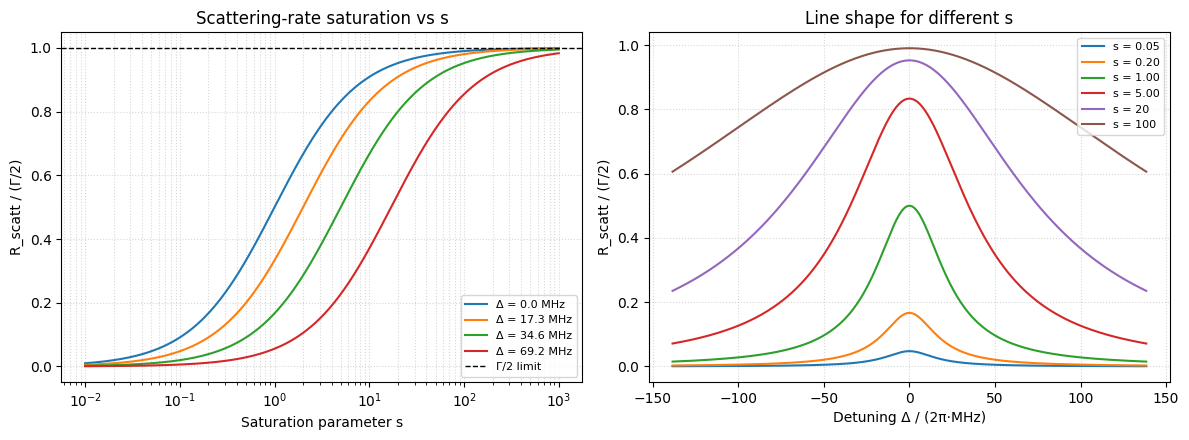

In [77]:
# Visualize how the scattering rate depends on saturation parameter and detuning
import numpy as np
import matplotlib.pyplot as plt

def scattering_rate(s, delta, gamma):
    return 0.5 * gamma * (s / (1.0 + s + 4.0 * (delta / gamma) ** 2))

current_species = species_data[species.value]
gamma_val = current_species["gamma"]

s_values = np.logspace(-2, 3, 400)
detuning_values = np.linspace(-4 * gamma_val, 4 * gamma_val, 600)

detuning_samples = [0.0, 0.5 * gamma_val, 1.0 * gamma_val, 2.0 * gamma_val]
saturation_samples = [0.05, 0.2, 1.0, 5.0, 20.0, 100.0]

rates_vs_s = {delta: scattering_rate(s_values, delta, gamma_val) for delta in detuning_samples}
rates_vs_delta = {s: scattering_rate(s, detuning_values, gamma_val) for s in saturation_samples}

fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(12, 4.5))

for delta, rates in rates_vs_s.items():
    label = f"Δ = {delta / (2 * math.pi * 1e6):.1f} MHz"
    ax_left.plot(s_values, rates / (gamma_val / 2), label=label)
ax_left.axhline(1.0, color="k", ls="--", lw=1, label="Γ/2 limit")
ax_left.set_xscale("log")
ax_left.set_xlabel("Saturation parameter s")
ax_left.set_ylabel("R_scatt / (Γ/2)")
ax_left.set_title("Scattering-rate saturation vs s")
ax_left.legend(loc="lower right", fontsize=8)
ax_left.grid(True, which="both", ls=":", alpha=0.5)

for s_val, rates in rates_vs_delta.items():
    label = f"s = {s_val:.2f}" if s_val < 10 else f"s = {s_val:.0f}"
    ax_right.plot(detuning_values / (2 * math.pi * 1e6), rates / (gamma_val / 2), label=label)
ax_right.set_xlabel("Detuning Δ / (2π·MHz)")
ax_right.set_ylabel("R_scatt / (Γ/2)")
ax_right.set_title("Line shape for different s")
ax_right.legend(loc="upper right", fontsize=8)
ax_right.grid(True, ls=":", alpha=0.5)

plt.tight_layout()
plt.show()

Here, we assume we are slowing down atoms at a constant deceleration using a counter-propagating laser beam at a rate $\frac{dv}{dt} = v \frac{dv}{dz} = - a$, and when we integrate over position we get the velocity profile as a function of position. Assuming constant deceleration, we can express the velocity as a function of position z along the slower as:
$$v(z) = \sqrt{v_0^2 - 2 a z}$$
where $v_0 = v(z=0)$ is the initial velocity of the atoms at the entrance of the slower, and $a$ is the constant deceleration which typically is $a=\eta a_{max}$ where eta is typically between 0.5 and 0.8.
Thus, the stopping distance L required to slow atoms from initial velocity $v_0$ to final velocity $v_f = v(z=L)$ is given by:
$$L = \frac{v_0^2 - v_f^2}{2 \eta a_{max}}$$
such that we can express the velocity profile:
$$v(z) = \sqrt{v_0^2 - \left(v_0^2 - v_f^2\right)\frac{z}{L}}$$

Assuming $v_f=0$ we can redefine $v(z)$ in terms of L as:
$$v(z) = v_0 \sqrt{1 - \frac{z}{L}}$$

When a beam of particles is slowed down using a counter-propagating laser beam, the particles experience a changing Doppler shift, $k v(z)$, as they decelerate, where $k$ is the wavevector of the laser light.
To maintain resonance between the laser frequency and the atomic transition, a spatially varying magnetic field, $B(z)$, is applied along the length of the slower (or a chirped laser $\omega_0 (z)$).

This magnetic field induces a Zeeman shift in the atomic energy levels, compensating for the changing Doppler shift.
$$\omega_0 \pm \frac{\mu B(z)}{\hbar} = \omega_L + k v(z)$$
where $\omega_0$ is the atomic transition frequency, $\omega_L$ is the laser frequency, $\mu$ is the Bohr magneton, and $v(z)$ is the velocity of the atoms at position z.

Hence, the ideal magnetic field profile for a Zeeman slower that maintains resonance throughout the slowing process via decreasing the field (+sign and $\sigma^+$ polarization) is given by:
$$B_+(z) = B_{bias,+} + B_0\sqrt{1-\frac{z}{L}}$$
where $B_0 = \frac{\hbar k v_0}{\mu} = \frac{h v_0}{\lambda \mu}$ is the maximum magnetic field strength at the entrance of the slower, and $B_{bias,+}$ is a constant offset magnetic field, such that $\mu B_{bias,+} = \hbar \delta_0$ where $\delta_0 = \omega_L - \omega_0$ is the detuning of the laser frequency from the atomic transition frequency.

Whereas the decreasing-field Zeeman slower (-sign and $\sigma^-$ polarization) is,
$$B_-(z) = B_{bias,-} + B_0\left(1-\sqrt{1-\frac{z}{L}}\right)$$
where $B_{bias,-}$ is a constant offset magnetic field, such that $\mu (B_{bias,-} + B_0)= \hbar \delta_0$ where $\delta_0 = \omega_0 - \omega_L$ is the detuning of the atomic transition frequency from the laser frequency.

In case of need to look for more spectral lines, please refer to: https://physics.nist.gov/PhysRefData/ASD/lines_form.html

Or atoms information Safranova 
https://www1.udel.edu/atom

## This code studies the decreasing-field Zeeman slower

In [78]:
%matplotlib inline

# Imports and setup
import math
import wave
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as w
from IPython.display import display, clear_output

# Physical constants (SI units)
hh = 6.62607015e-34  # J*s (Planck constant)
hbar = hh / (2.0 * math.pi)
mu = 9.274009994e-24  # J/T (Bohr magneton)
amu = 1.66053906660e-27  # kg (atomic mass unit)


def plot_profile(z_plt, v_plt, B_plt, L_plt):
    """Plot magnetic field (in Gauss) and velocity vs position.

    - Left y-axis: B(z) in Gauss (1 T = 1e4 G).
    - Right y-axis: v(z) in m/s.
    Both axes start at 0 and go to the current maximum value.
    """
    fig, ax1 = plt.subplots(figsize=(7,4))
    ax1.set_xlabel("z (m)")
    ax1.set_ylabel("B (G)", color='tab:blue')
    ax1.plot(z_plt, B_plt*1e4, color='tab:blue', lw=2, label='B(z) [G]')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.grid(True, ls='--', alpha=0.4)

    # Twin axis for velocity
    ax2 = ax1.twinx()
    ax2.set_ylabel("v (m/s)", color='tab:orange')
    ax2.plot(z_plt, v_plt, color='tab:orange', lw=2, label='v(z) [m/s]')
    ax2.tick_params(axis='y', labelcolor='tab:orange')

    # Set y-limits to start at 0 and go to a little above the current max
    try:
        max_B = np.nanmax(B_plt * 1e4)
    except Exception:
        max_B = None
    try:
        max_v = np.nanmax(v_plt)
    except Exception:
        max_v = None

    if (max_B is None) or (not np.isfinite(max_B)):
        max_B = 1.0
    if (max_v is None) or (not np.isfinite(max_v)):
        max_v = 1.0

    # Ensure positive upper limits; add 5% margin
    upper_B = max(1e-8, max_B) * 1.05
    upper_v = max(1e-8, max_v) * 1.05

    ax1.set_ylim(0.0, upper_B)
    ax2.set_ylim(0.0, upper_v)

    ax1.set_title(f"Zeeman slower profile (L = {L_plt:.3f} m)")
    plt.tight_layout()
    plt.show()

### Species parameters
Here we define several atomic species parameters such as mass, wavelength, linewidth, etc.

In [83]:
# Species dropdown with mass, wavelength (m), and gamma (rad/s)
species_data = {
    'Ca-40':   {'mass': 40.078,  'wavelength': 422.67276e-9, 'gamma': 2 * math.pi * 34.6e6},
    'Sr-88':   {'mass': 87.62,   'wavelength': 460.862e-9,    'gamma': 2 * math.pi * 32.0e6},
    'Rb-87':   {'mass': 86.909,  'wavelength': 780.241e-9,    'gamma': 2 * math.pi * 6.065e6},
    'Cs-133':  {'mass': 132.905, 'wavelength': 852.347e-9,    'gamma': 2 * math.pi * 5.234e6},
    'Na-23':   {'mass': 22.990,  'wavelength': 589.158e-9,    'gamma': 2 * math.pi * 9.79e6},
    'Yb-174':  {'mass': 173.045, 'wavelength': 398.911e-9,    'gamma': 2 * math.pi * 29.0e6},
}

species = w.Dropdown(
    description='Species',
    options=list(species_data.keys()),
    value='Ca-40'
 )

# If the interactive widgets already exist, refresh them so display labels
# pick up any newly edited parameter values (e.g., gamma).
for refresh_func_name in ("refresh_simple", "refresh_advanced"):
    refresh_callable = globals().get(refresh_func_name)
    if callable(refresh_callable):
        try:
            refresh_callable()
        except Exception as exc:
            print(f"Warning: {refresh_func_name} failed to refresh ({exc})")

## Simple model for Zeeman slower design

Assuming final velocity 0 and increasing-field Zeeman slower.

In [84]:
def compute_B_z_simple(
    L_z = 0.3,                    # length of the slower [m] (e.g., 0.3 m)
    wavelength=422.67276e-9,     # transition wavelength [m] (e.g., Ca-40)
    v0=500.0,                    # capture (initial) speed at z=0 [m/s]
    n_points=500,                # number of points in z grid
    B_bias=200.0e-4              # bias magnetic field [T]
 ):
    """Compute constant-deceleration Zeeman-slower profile."""
    zz = np.linspace(0.0, L_z, n_points)
    vv = v0 * np.sqrt(1 - zz / L_z)
    B_z = B_bias + (hh * v0) / (mu * wavelength) * (1 - np.sqrt(1 - zz / L_z))
    return zz, vv, B_z, L_z

# Sliders (continuous_update=False avoids flicker & overdraw)
v0 = w.FloatSlider(description="v0 (m/s)", value=500.0, min=0.0, max=1200.0, step=5.0, continuous_update=False)
L_z = w.FloatSlider(description="L_z (m)", value=0.3, min=0.0, max=1.0, step=0.01, continuous_update=False)
points = w.IntSlider(description="points", value=600, min=200, max=2000, step=50, continuous_update=False)
B_bias = w.FloatSlider(description="B_bias (G)", value=200, min=0.0, max=1000.0, step=1.0, continuous_update=False)

# Info display widgets
wavelength_label_simple = w.HTML()
gamma_label_simple = w.HTML()

# Output area
out_simple = w.Output()

def update_info_simple():
    d = species_data[species.value]
    wavelength_label_simple.value = f"<b>λ</b>: {d['wavelength']*1e9:.3f} nm"
    gamma_label_simple.value = f"<b>Γ/2π</b>: {d['gamma']/(2*math.pi)/1e6:.3f} MHz"

def refresh_simple(change=None):
    with out_simple:
        clear_output(wait=True)
        d = species_data[species.value]
        update_info_simple()
        try:
            zz, vv, BB, LL = compute_B_z_simple(
                L_z=L_z.value,
                wavelength=d['wavelength'],
                v0=v0.value,
                n_points=points.value,
                B_bias=B_bias.value * 1e-4,
            )
        except Exception as exc:
            print("Parameter error:", exc)
            return
        plot_profile(zz, vv, BB, LL)

for widget in (species, v0, L_z, points, B_bias):
    widget.observe(refresh_simple, names='value')

# UI container
ui_simple = w.VBox([
    w.HBox([species, wavelength_label_simple, gamma_label_simple]),
    w.HBox([v0, L_z, points]),
    w.HBox([B_bias]),
])

# Initial render
refresh_simple()

# Display (explicit display fixes plain text repr issues)
display(ui_simple, out_simple)

Output()

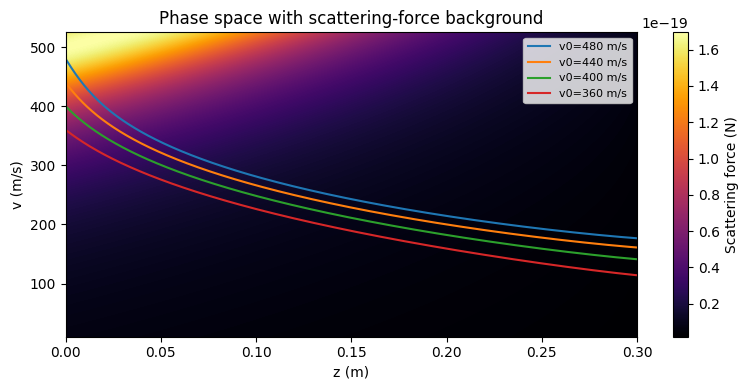

In [81]:
# Phase-space trajectories for the ideal Zeeman field profile
import numpy as np
import matplotlib.pyplot as plt

species_name = "Ca-40"
spec = species_data[species_name]
wavelength = spec["wavelength"]
gamma = spec["gamma"]
mass = spec["mass"] * amu
k = 2 * math.pi / wavelength
g_eff_val = 1.0

v_capture = 500.0  # m/s
v_final = 50.0  # m/s
s0_val = 200.0
B_bias_gauss = 200.0
L_design = 0.30

z_axis, v_profile, B_profile_T, _ = compute_B_z_simple(
    L_z=L_design,
    wavelength=wavelength,
    v0=v_capture,
    n_points=800,
    B_bias=B_bias_gauss * 1e-4,
)

# Laser detuning chosen so the entrance stays on resonance
# delta = delta_laser + k*v - g*mu*B/hbar = 0 when z=0 and v=v_capture
# => delta_laser = g*mu*B(0)/hbar - k*v_capture
delta_laser = g_eff_val * mu * B_profile_T[0] / hbar - k * v_capture


def scattering_force(B_T, velocity):
    delta = delta_laser + k * velocity - g_eff_val * mu * B_T / hbar
    denom = 1.0 + s0_val + (2.0 * delta / gamma) ** 2
    return hbar * k * gamma / 2.0 * (s0_val / denom)


def integrate_trajectory(v_init):
    traj = np.zeros_like(z_axis)
    traj[0] = v_init
    for idx in range(len(z_axis) - 1):
        v_curr = max(traj[idx], 1e-6)
        dz = z_axis[idx + 1] - z_axis[idx]
        force = scattering_force(B_profile_T[idx], v_curr)
        acc = force / mass
        traj[idx + 1] = max(traj[idx] - acc * dz / v_curr, 0.0)
    return traj


vel_axis = np.linspace(v_final * 0.2, v_capture * 1.05, 400)
force_grid = np.zeros((len(z_axis), len(vel_axis)))
for i, B_val in enumerate(B_profile_T):
    delta = delta_laser + k * vel_axis - g_eff_val * mu * B_val / hbar
    denom = 1.0 + s0_val + (2.0 * delta / gamma) ** 2
    force_grid[i] = hbar * k * gamma / 2.0 * (s0_val / denom)

initial_velocities = [480.0, 440.0, 400.0, 360.0]

fig, ax = plt.subplots(figsize=(8, 4))
im = ax.imshow(
    force_grid.T,
    extent=[z_axis[0], z_axis[-1], vel_axis[0], vel_axis[-1]],
    origin="lower",
    aspect="auto",
    cmap="inferno",
)
for v_init in initial_velocities:
    traj = integrate_trajectory(v_init)
    ax.plot(z_axis, traj, label=f"v0={v_init:.0f} m/s")

ax.set_xlabel("z (m)")
ax.set_ylabel("v (m/s)")
ax.set_title("Phase space with scattering-force background")

cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Scattering force (N)")
ax.legend(loc="upper right", fontsize=8)
plt.tight_layout()
plt.show()

In [87]:
def compute_B_z_forces(mass_amu=40.078, wavelength=422.67276e-9, gamma=2*math.pi*34.6e6, g_eff=1.0,
                    v0=500.0, vf=50.0, B_bias=250, eta=0.5, n_points=500):
    m = mass_amu * amu
    k = 2 * math.pi / wavelength
    F_max = hbar * k * gamma / 2.0      # * (s0 / (1.0 + s0))
    print(f"max force: {F_max:.3e} N")
    a_max = F_max / m
    a = eta * a_max
    if a <= 0:
        raise ValueError("Computed deceleration <= 0; check s0 and eta")
    if v0 <= vf:
        raise ValueError("Initial velocity v0 must be > final velocity vf")
    L = (v0*v0 - vf*vf) / (2.0*a)
    print(f"length: {L*100:.3f} cm")
    B_delta = hbar * k / (mu * g_eff) * v0
    print(B_delta)
    B_bias_T = B_bias * 1e-4  # Convert Gauss to Tesla
    z = np.linspace(0.0, L, n_points)
    v = np.sqrt(v0**2 - (v0**2 - vf**2) * z / L)
    BB = B_bias_T + B_delta * (1 - np.sqrt(1 - ((v0**2 - vf**2)/v0**2) * (z / L)))
    detu = - mu * g_eff * (B_bias_T + B_delta) / hbar
    print('Detuning:', detu, 'Hz')
    return z, v, BB, L, detu

# Sliders (continuous_update=False avoids flicker & overdraw)
v0 = w.FloatSlider(description="v0 (m/s)", value=500.0, min=0.0, max=1200.0, step=5.0, continuous_update=False)
vf = w.FloatSlider(description="vf (m/s)", value=50.0, min=0.0, max=600.0, step=5.0, continuous_update=False)
eta = w.FloatSlider(description="eta", value=0.5, min=0.01, max=1.0, step=0.01, continuous_update=False)
B_bias = w.FloatSlider(description="B_bias (Gauss)", value=250.0, min=1, max=500.0, step=1, continuous_update=False)
g_eff = w.FloatSlider(description="g_eff", value=1.0, min=0.1, max=2.0, step=0.01, continuous_update=False)
# points = w.IntSlider(description="points", value=600, min=200, max=2000, step=50, continuous_update=False)

# Info display widgets
wavelength_label_advanced = w.HTML()
gamma_label_advanced = w.HTML()

# Output area
out_advanced = w.Output()

def update_info_advanced():
    d = species_data[species.value]
    wavelength_label_advanced.value = f"<b>λ</b>: {d['wavelength']*1e9:.3f} nm"
    gamma_label_advanced.value = f"<b>Γ/2π</b>: {d['gamma']/(2*math.pi)/1e6:.3f} MHz"

# Update logic (uses .observe for each slider)

def refresh_advanced(change=None):
    with out_advanced:
        clear_output(wait=True)
        d = species_data[species.value]
        update_info_advanced()
        try:
            z, v, B, L, detu = compute_B_z_forces(mass_amu=d['mass'], wavelength=d['wavelength'],
                                         gamma=d['gamma'],
                                         v0=v0.value, vf=vf.value, eta=eta.value,
                                         B_bias=B_bias.value, g_eff=g_eff.value,
                                         n_points=points.value)
        except Exception as e:
            print("Parameter error:", e)
            return
        plot_profile(z, v, B, L)

for widget in (species, v0, vf, eta, B_bias, g_eff): #, points):
    widget.observe(refresh_advanced, names='value')

# UI container
ui_advanced = w.VBox([
    w.HBox([species, wavelength_label_advanced, gamma_label_advanced]),
    w.HBox([v0, vf]),
    w.HBox([eta, B_bias, g_eff]),
    # points
])

# Initial render
refresh_advanced()

# Display (explicit display fixes plain text repr issues)
display(ui_advanced, out_advanced)

Output()

[comment]: # (Here, we assume we are slowing down atoms at a constant deceleration using a counter-propagating laser beam at a rate $\frac{dv}{dt} = -\eta a_{max}$, where $a_{max} = \frac{\hbar k \Gamma}{2 m} \frac{s_0}{1 + s_0}$ is the maximum achievable deceleration, $\eta$ is the design parameter (0 < $\eta$ < 1), $s_0$ is the on-resonance saturation parameter, and $\Gamma$ is the natural linewidth of the atomic transition.)